<a href="https://colab.research.google.com/github/hawaesanda/PCVK_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Modul 6**
Histogram, Histogram Equalization, Dithering

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

 Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart dibawah ini : (Gunakan gambar lena.jpg)



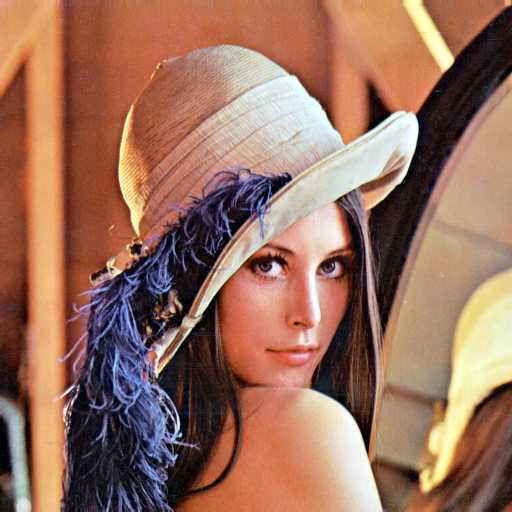

In [5]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
cv2_imshow(img)

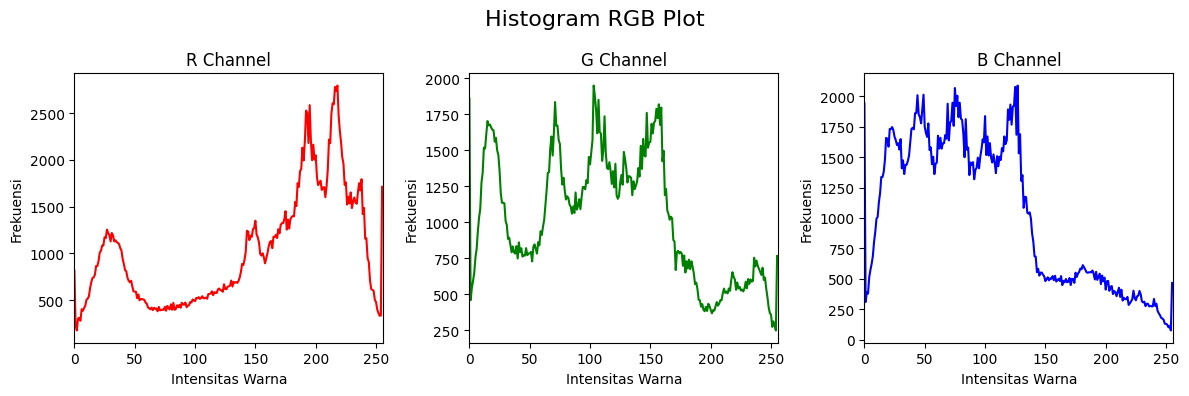

In [10]:
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
colors = ('r', 'g', 'b')
plt.figure(figsize=(12,4))
plt.suptitle("Histogram RGB Plot", fontsize=16)

for i, color in enumerate(colors):
  plt.subplot(1, 3, i+1)
  hist = cv.calcHist([rgb_img], [i], None, [256], [0, 256])
  plt.plot(hist, color=color)
  plt.xlim([0, 256])
  plt.title(f'{color.upper()} Channel')
  plt.xlabel("Intensitas Warna")
  plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

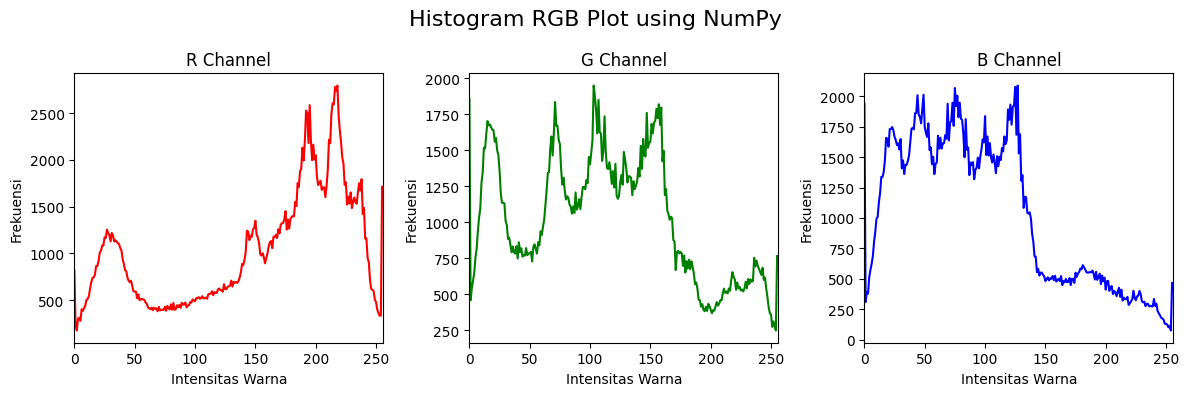

In [12]:
# Menggunakan NumPy histogram
plt.figure(figsize=(12,4))
plt.suptitle("Histogram RGB Plot using NumPy", fontsize=16)

for i, color in enumerate(colors):
  plt.subplot(1, 3, i+1)
  hist, bins = np.histogram(rgb_img[:,:,i].flatten(), 256, [0, 256])
  plt.plot(hist, color=color)
  plt.xlim([0, 256])
  plt.title(f'{color.upper()} Channel')
  plt.xlabel("Intensitas Warna")
  plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

# Perbandingan:
# Output yang dihasilkan antara library cv dan numpy secara keseluruhan sama dan sangat mirip

Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

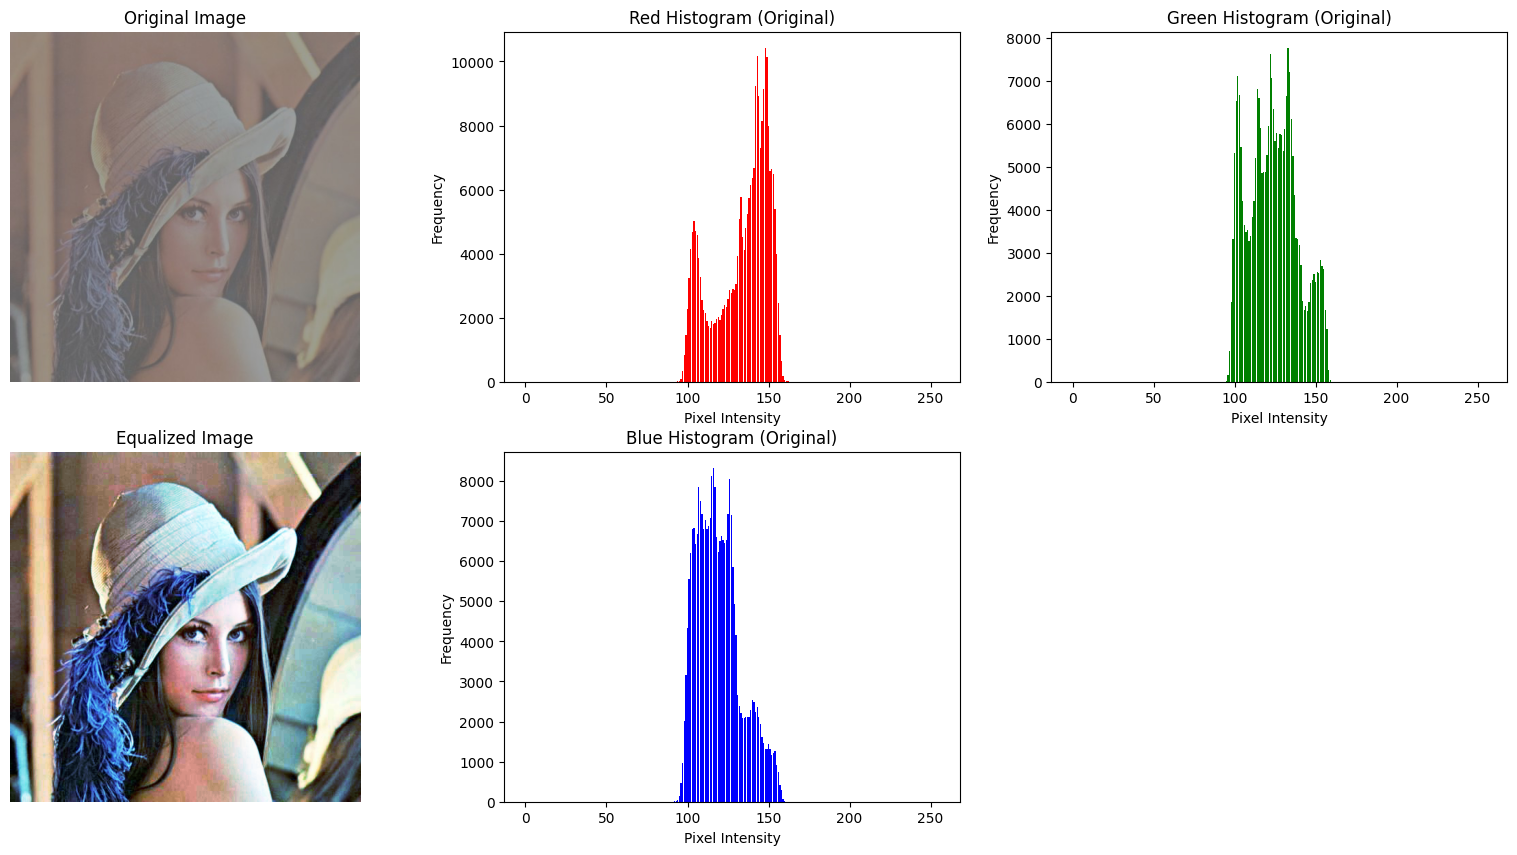

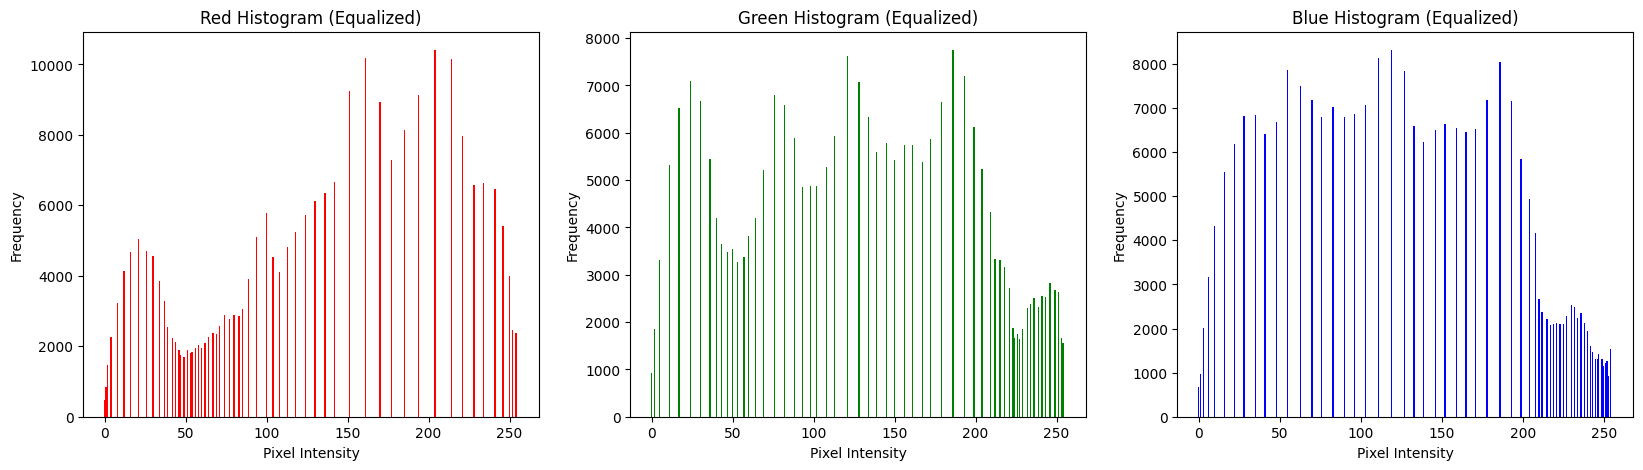

In [20]:
# Fungsi untuk menghitung histogram dari setiap kanal warna
def calculate_histogram(image):
    red_hist = np.zeros(256)
    green_hist = np.zeros(256)
    blue_hist = np.zeros(256)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            red_hist[image[i, j, 0]] += 1
            green_hist[image[i, j, 1]] += 1
            blue_hist[image[i, j, 2]] += 1

    return red_hist, green_hist, blue_hist

# Fungsi untuk menghitung histogram kumulatif
def cumulative_histogram(hist):
    cum_hist = np.cumsum(hist)
    return cum_hist

# Fungsi untuk normalisasi histogram kumulatif
def normalize_histogram(cum_hist, total_pixels):
    norm_hist = (cum_hist - cum_hist.min()) / (cum_hist.max() - cum_hist.min()) * 255
    norm_hist = norm_hist.astype('uint8')
    return norm_hist

# Fungsi untuk melakukan equalization pada citra berdasarkan histogram yang sudah distandarisasi
def equalize_image(image, red_norm, green_norm, blue_norm):
    equalized_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i, j, 0] = red_norm[image[i, j, 0]]
            equalized_image[i, j, 1] = green_norm[image[i, j, 1]]
            equalized_image[i, j, 2] = blue_norm[image[i, j, 2]]

    return equalized_image

# Fungsi utama untuk menjalankan histogram equalization
def histogram_equalization(image):
    red_hist, green_hist, blue_hist = calculate_histogram(image)
    total_pixels = image.shape[0] * image.shape[1]

    red_cum_hist = cumulative_histogram(red_hist)
    green_cum_hist = cumulative_histogram(green_hist)
    blue_cum_hist = cumulative_histogram(blue_hist)

    red_norm_hist = normalize_histogram(red_cum_hist, total_pixels)
    green_norm_hist = normalize_histogram(green_cum_hist, total_pixels)
    blue_norm_hist = normalize_histogram(blue_cum_hist, total_pixels)

    equalized_image = equalize_image(image, red_norm_hist, green_norm_hist, blue_norm_hist)

    return equalized_image, red_hist, green_hist, blue_hist

# Membaca gambar dan mengonversi ke RGB
image = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Melakukan histogram equalization pada gambar
equalized_image, red_hist, green_hist, blue_hist = histogram_equalization(image_rgb)

# Menghitung histogram setelah equalization
equalized_red_hist, equalized_green_hist, equalized_blue_hist = calculate_histogram(equalized_image)

# Plot hasil sebelum dan sesudah equalization
plt.figure(figsize=(20, 10))

# Plot gambar asli
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Plot gambar setelah equalization
plt.subplot(2, 3, 4)
plt.imshow(equalized_image)
plt.title('Equalized Image')
plt.axis('off')

# Plot histogram original per kanal (Red)
plt.subplot(2, 3, 2)
plt.bar(np.arange(256), red_hist, color='r')
plt.title('Red Histogram (Original)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram original per kanal (Green)
plt.subplot(2, 3, 3)
plt.bar(np.arange(256), green_hist, color='g')
plt.title('Green Histogram (Original)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram original per kanal (Blue)
plt.subplot(2, 3, 5)
plt.bar(np.arange(256), blue_hist, color='b')
plt.title('Blue Histogram (Original)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram setelah equalization per kanal (Red)
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.bar(np.arange(256), equalized_red_hist, color='r')
plt.title('Red Histogram (Equalized)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram setelah equalization per kanal (Green)
plt.subplot(1, 3, 2)
plt.bar(np.arange(256), equalized_green_hist, color='g')
plt.title('Green Histogram (Equalized)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram setelah equalization per kanal (Blue)
plt.subplot(1, 3, 3)
plt.bar(np.arange(256), equalized_blue_hist, color='b')
plt.title('Blue Histogram (Equalized)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

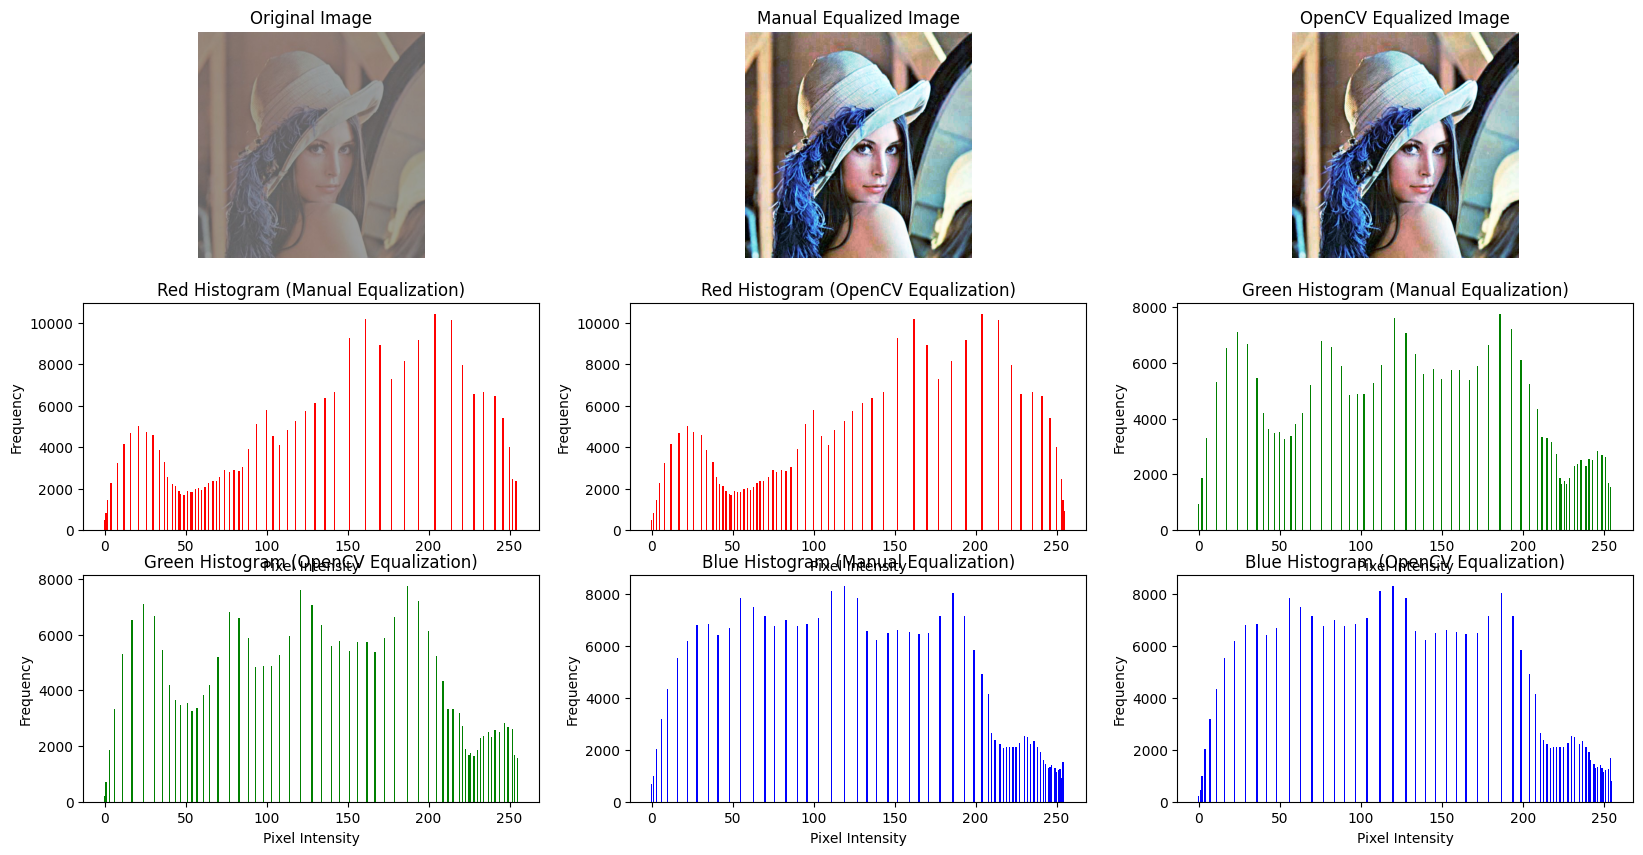

In [22]:
# Fungsi untuk menghitung histogram dari setiap kanal warna
def calculate_histogram(image):
    red_hist = np.zeros(256)
    green_hist = np.zeros(256)
    blue_hist = np.zeros(256)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            red_hist[image[i, j, 0]] += 1
            green_hist[image[i, j, 1]] += 1
            blue_hist[image[i, j, 2]] += 1

    return red_hist, green_hist, blue_hist

# Fungsi manual histogram equalization yang sudah dibuat sebelumnya
def manual_histogram_equalization(image):
    # Menghitung histogram untuk setiap kanal
    red_hist, green_hist, blue_hist = calculate_histogram(image)
    total_pixels = image.shape[0] * image.shape[1]

    # Menghitung histogram kumulatif
    red_cum_hist = np.cumsum(red_hist)
    green_cum_hist = np.cumsum(green_hist)
    blue_cum_hist = np.cumsum(blue_hist)

    # Normalisasi histogram kumulatif
    red_norm_hist = (red_cum_hist - red_cum_hist.min()) / (red_cum_hist.max() - red_cum_hist.min()) * 255
    green_norm_hist = (green_cum_hist - green_cum_hist.min()) / (green_cum_hist.max() - green_cum_hist.min()) * 255
    blue_norm_hist = (blue_cum_hist - blue_cum_hist.min()) / (blue_cum_hist.max() - blue_cum_hist.min()) * 255

    red_norm_hist = red_norm_hist.astype('uint8')
    green_norm_hist = green_norm_hist.astype('uint8')
    blue_norm_hist = blue_norm_hist.astype('uint8')

    # Membuat gambar equalized berdasarkan histogram yang dinormalisasi
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i, j, 0] = red_norm_hist[image[i, j, 0]]
            equalized_image[i, j, 1] = green_norm_hist[image[i, j, 1]]
            equalized_image[i, j, 2] = blue_norm_hist[image[i, j, 2]]

    return equalized_image

# Membaca gambar dan mengonversi ke RGB
image = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Equalization menggunakan metode manual
manual_eq_image = manual_histogram_equalization(image_rgb)

# Equalization menggunakan fungsi bawaan OpenCV (equalizeHist) untuk setiap kanal warna
r, g, b = cv.split(image_rgb)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

opencv_eq_image = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram setelah equalization menggunakan kedua metode
manual_red_hist, manual_green_hist, manual_blue_hist = calculate_histogram(manual_eq_image)
opencv_red_hist, opencv_green_hist, opencv_blue_hist = calculate_histogram(opencv_eq_image)

# Plot hasil dari kedua metode
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Manual Equalization Image
plt.subplot(3, 3, 2)
plt.imshow(manual_eq_image)
plt.title('Manual Equalized Image')
plt.axis('off')

# OpenCV Equalization Image
plt.subplot(3, 3, 3)
plt.imshow(opencv_eq_image)
plt.title('OpenCV Equalized Image')
plt.axis('off')

# Plot histogram Red (Manual)
plt.subplot(3, 3, 4)
plt.bar(np.arange(256), manual_red_hist, color='r')
plt.title('Red Histogram (Manual Equalization)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram Red (OpenCV)
plt.subplot(3, 3, 5)
plt.bar(np.arange(256), opencv_red_hist, color='r')
plt.title('Red Histogram (OpenCV Equalization)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram Green (Manual)
plt.subplot(3, 3, 6)
plt.bar(np.arange(256), manual_green_hist, color='g')
plt.title('Green Histogram (Manual Equalization)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram Green (OpenCV)
plt.subplot(3, 3, 7)
plt.bar(np.arange(256), opencv_green_hist, color='g')
plt.title('Green Histogram (OpenCV Equalization)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram Blue (Manual)
plt.subplot(3, 3, 8)
plt.bar(np.arange(256), manual_blue_hist, color='b')
plt.title('Blue Histogram (Manual Equalization)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot histogram Blue (OpenCV)
plt.subplot(3, 3, 9)
plt.bar(np.arange(256), opencv_blue_hist, color='b')
plt.title('Blue Histogram (OpenCV Equalization)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

# Perbandiangan:
# Output yang dihasilkan sangat mirip, tetapi ada sedikit perbedaan karena proses normalisasi histogram manual sedikit beberda dengan algoritma OpenCV. Open CV lebih optimal karena sudah teruji dan dioptimalisasikan. Sedangkan manual tergantung pada cara kita menghitung dan menerapkan histogram equalization.

Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

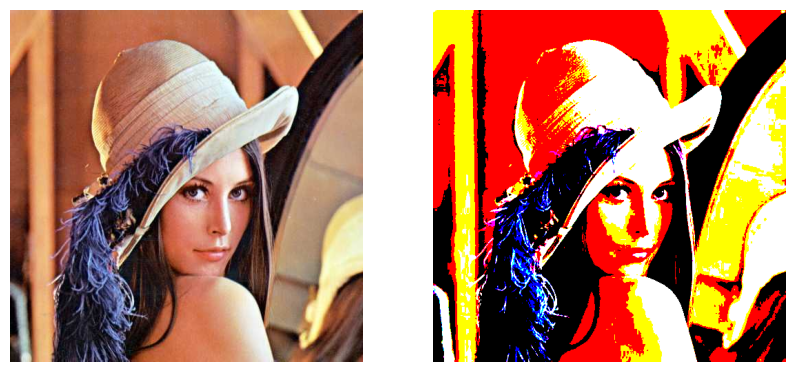

In [24]:
lena = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
lena_bgr = cv.cvtColor(lena, cv.COLOR_RGB2BGR)
# Pemetaan 16 juta warna RGB ke dalam 8 warna
def mapping_color(image):
    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if red[i][j] < 128:
                red[i][j] = 0
            else:
                red[i][j] = 255
            if green[i][j] < 128:
                green[i][j] = 0
            else:
                green[i][j] = 255
            if blue[i][j] < 128:
                blue[i][j] = 0
            else:
                blue[i][j] = 255
    return red, green, blue

red_map, green_map, blue_map = mapping_color(lena)

# Citra hasil pemetaan 16 juta warna RGB ke dalam 8 warna
lena_map = cv.merge([red_map, green_map, blue_map])
lena_map_rgb = cv.cvtColor(lena_map, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(lena_bgr)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lena_map_rgb)
plt.axis('off')

plt.show()

Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

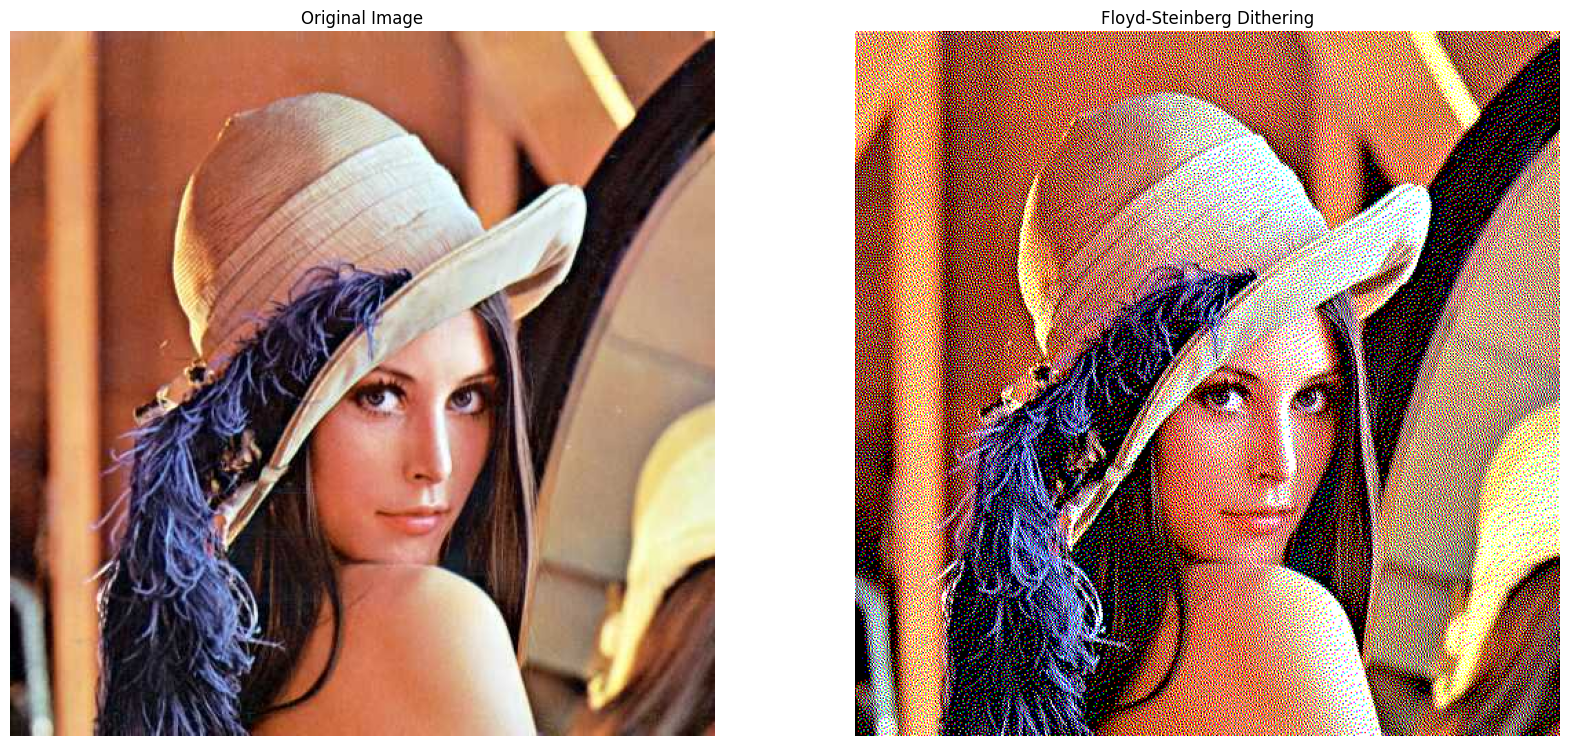

In [26]:
# Load image
lena = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

# Define Floyd-Steinberg dithering function for one color channel
def floyd_steinberg_dithering(channel):
    h, w = channel.shape
    channel = channel.astype(float)  # Convert to float for processing

    # Iterate over each pixel
    for i in range(h):
        for j in range(w):
            old_pixel = channel[i, j]
            new_pixel = 255 * round(old_pixel / 255)  # Quantize pixel value
            channel[i, j] = new_pixel
            error = old_pixel - new_pixel  # Calculate error

            # Diffuse the error to neighboring pixels (Floyd-Steinberg matrix)
            if j + 1 < w:
                channel[i, j + 1] += error * 7 / 16
            if i + 1 < h and j > 0:
                channel[i + 1, j - 1] += error * 3 / 16
            if i + 1 < h:
                channel[i + 1, j] += error * 5 / 16
            if i + 1 < h and j + 1 < w:
                channel[i + 1, j + 1] += error * 1 / 16

    # Clip values to valid range [0, 255]
    return np.clip(channel, 0, 255).astype(np.uint8)

# Apply Floyd-Steinberg dithering to each channel (B, G, R)
def floyd_steinberg_dithering_rgb(image):
    # Split into BGR channels
    b, g, r = cv.split(image)

    # Apply dithering to each channel
    b_dithered = floyd_steinberg_dithering(b)
    g_dithered = floyd_steinberg_dithering(g)
    r_dithered = floyd_steinberg_dithering(r)

    # Merge channels back into an image
    return cv.merge([b_dithered, g_dithered, r_dithered])

# Apply the dithering to the loaded image
lena_dithered = floyd_steinberg_dithering_rgb(lena)

# Display original and dithered image side by side
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(lena, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Original Image')
plt.axis('off')

# Dithered Image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(lena_dithered, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.show()

Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

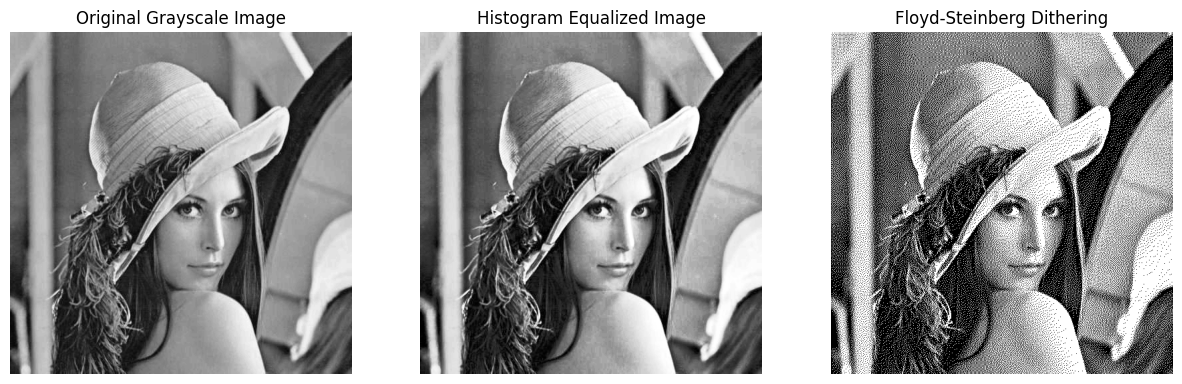

In [30]:
# Load the grayscale image
image_path = '/content/drive/MyDrive/Images/lena_lc.jpg'
lena_lc = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv.equalizeHist(lena_lc)

# Define Floyd-Steinberg dithering function
def floyd_steinberg_dithering(image):
    h, w = image.shape
    image = image.astype(float)

    # Iterate over each pixel
    for i in range(h):
        for j in range(w):
            old_pixel = image[i, j]
            new_pixel = 255 * round(old_pixel / 255)  # Quantize pixel value
            image[i, j] = new_pixel
            error = old_pixel - new_pixel  # Calculate error

            # Diffuse the error to neighboring pixels (Floyd-Steinberg matrix)
            if j + 1 < w:
                image[i, j + 1] += error * 7 / 16
            if i + 1 < h and j > 0:
                image[i + 1, j - 1] += error * 3 / 16
            if i + 1 < h:
                image[i + 1, j] += error * 5 / 16
            if i + 1 < h and j + 1 < w:
                image[i + 1, j + 1] += error * 1 / 16

    # Clip values to valid range [0, 255]
    return np.clip(image, 0, 255).astype(np.uint8)

# Apply Floyd-Steinberg dithering to the equalized image
dithered_image = floyd_steinberg_dithering(equalized_image)

# Display original, equalized, and dithered images
plt.figure(figsize=(15, 8))

# Original greyscale image
plt.subplot(1, 3, 1)
plt.imshow(lena_lc, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

# Dithered image
plt.subplot(1, 3, 3)
plt.imshow(dithered_image, cmap='gray')
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.show()